#### import the libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
df = pd.read_csv('archive/netflix_titles.csv')

#### 1. Checking the size of the dataset and datatypes

In [22]:
df.shape

(7787, 12)

In [23]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [24]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [25]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [26]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### 2. Check for missing values

In [28]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [29]:
pd.DataFrame(df.isnull().sum()/df.shape[0]*100).rename(columns={'index':'Columns',0:'%age of missing'}).\
sort_values(by='%age of missing',ascending=False).reset_index()

,index,%age of missing
0,director,30.679337
1,cast,9.220496
2,country,6.510851
3,date_added,0.128419
4,rating,0.089893
5,show_id,0.000000
6,type,0.000000
7,title,0.000000
8,release_year,0.000000
9,duration,0.000000


There are nulls in the data

*director:2389, cast: 718  , country:507,  date_added:10,  rating:0*

#### 3. Check for duplicated values

In [30]:
df.duplicated().sum()

0

In [31]:
df.duplicated().any()

False

#### 4. Check for Unique values

In [32]:
pd.DataFrame(df.nunique()).T

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,7787,2,7787,4049,6831,681,1565,73,14,216,492,7769


In [33]:
pd.DataFrame(df.nunique()/df.shape[0]*100).reset_index().\
rename(columns={'index':'Columns',0:'%age of unique'}).\
sort_values(by='%age of unique',ascending=False)

,Columns,%age of unique
0,show_id,100.000000
2,title,100.000000
11,description,99.768846
4,cast,87.723128
3,director,51.996918
6,date_added,20.097599
5,country,8.745345
10,listed_in,6.318223
9,duration,2.773854
7,release_year,0.937460


#### Missing values

In [34]:
# 0	director	30.679337
# 1	cast	9.220496
# 2	country	6.510851
# 3	date_added	0.128419
# 4	rating	0.089893

df['director'].fillna('Director NA',inplace=True)
df['cast'].fillna('Cast NA',inplace=True)
df['country' ].fillna('Country NA',inplace=True)


In [35]:
df.dropna(inplace=True)

In [36]:
df.shape

(7770, 12)

#####  Observation on Type

In [37]:
#visualizations
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

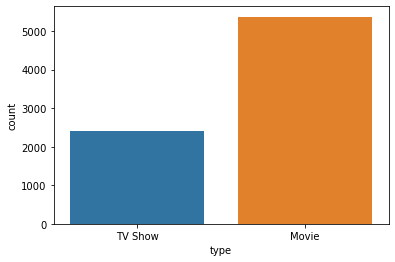

In [38]:
#sns.set_style("whitegrid")
ax=sns.countplot(x='type',data=df)

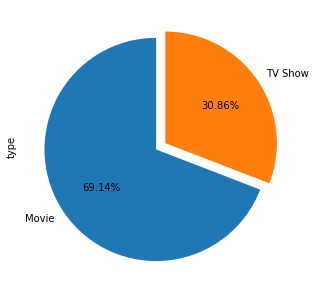

In [39]:
df['type'].value_counts().plot(kind='pie',figsize=(5,7),
                                      startangle=90,autopct='%1.2f%%',
                              explode=[0.05,0.05]);

##### Near 69% of content on netflix is movies and 30% is TV Shows

##### Observation on Country

In [40]:
df['country2']=df['country'].str.split(',')
df['country2']

0                                                [Brazil]
1                                                [Mexico]
2                                             [Singapore]
3                                         [United States]
4                                         [United States]
                              ...                        
7782    [Sweden,  Czech Republic,  United Kingdom,  De...
7783                                              [India]
7784                                         [Country NA]
7785                                          [Australia]
7786            [United Kingdom,  Canada,  United States]
Name: country2, Length: 7770, dtype: object

In [68]:
# function to convert pandas columns
def to_1D(series):
    return pd.Series([x.strip() for _list in series for x in _list])

In [52]:
country_count=to_1D(df['country2']).value_counts().reset_index()
country_count.columns=['Country','Country Counts']
country_count.sort_values(by='Country Counts',ascending= False)

,Country,Country Counts
0,United States,3288
1,India,990
2,United Kingdom,722
3,Country NA,505
4,Canada,412
...,...,...
95,Dominican Republic,1
96,Jamaica,1
97,Samoa,1
98,Afghanistan,1


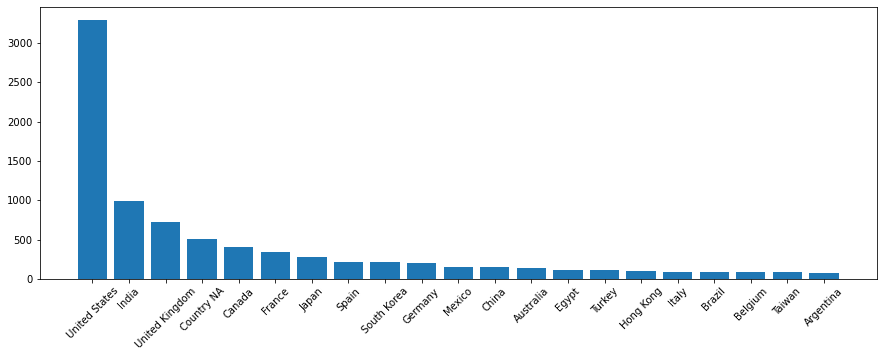

In [43]:
# top 20 countries
fig,ax = plt.subplots(figsize=(15,5))
ax.bar(country_count.loc[:20,'Country'],country_count.loc[:20,'Country Counts'])
plt.xticks(rotation=45);

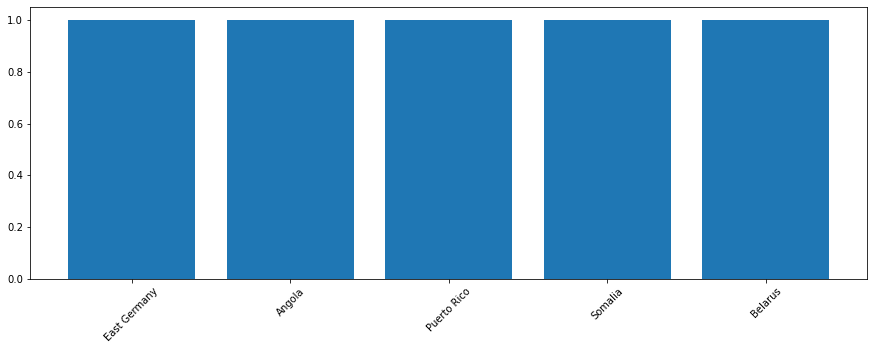

In [57]:
# bottom 5 countries
fig,ax = plt.subplots(figsize=(15,5))
ax.bar(country_count.iloc[-5:,0],country_count.iloc[-5:,1])
plt.xticks(rotation=45);

#####  Observation on Genre

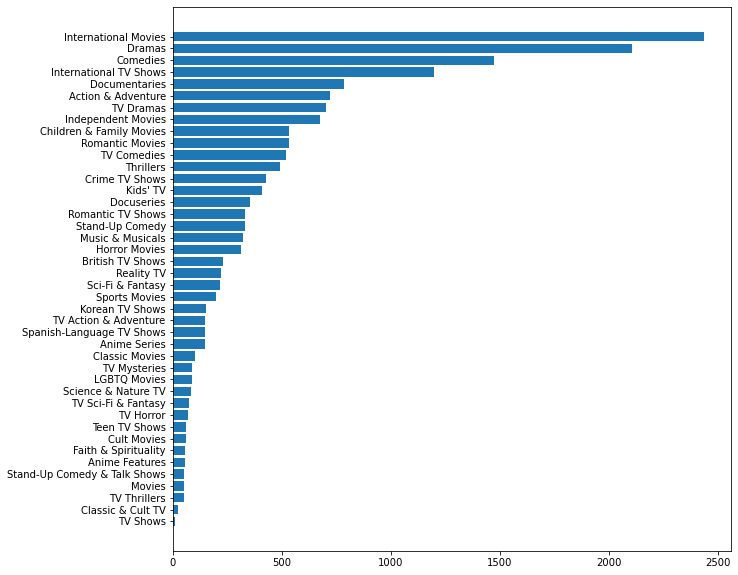

In [45]:
df['genre'] = df['listed_in'].str.split(',')
genre_counts=to_1D(df['genre']).value_counts().reset_index()
genre_counts.columns=['Genre','Genre_counts']
genre_counts

fig,ax=plt.subplots(figsize=(10,10))
ax.barh(genre_counts['Genre'],genre_counts['Genre_counts'])
ax.invert_yaxis()

#####  Observation on Genre

In [47]:
tvshow_genres= df[df['type']=='TV Show']
movie_genres=  df[df['type']=='Movie']

C:\Users\u6077221\AppData\Local\Continuum\anaconda3\envs\webdev\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\u6077221\AppData\Local\Continuum\anaconda3\envs\webdev\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


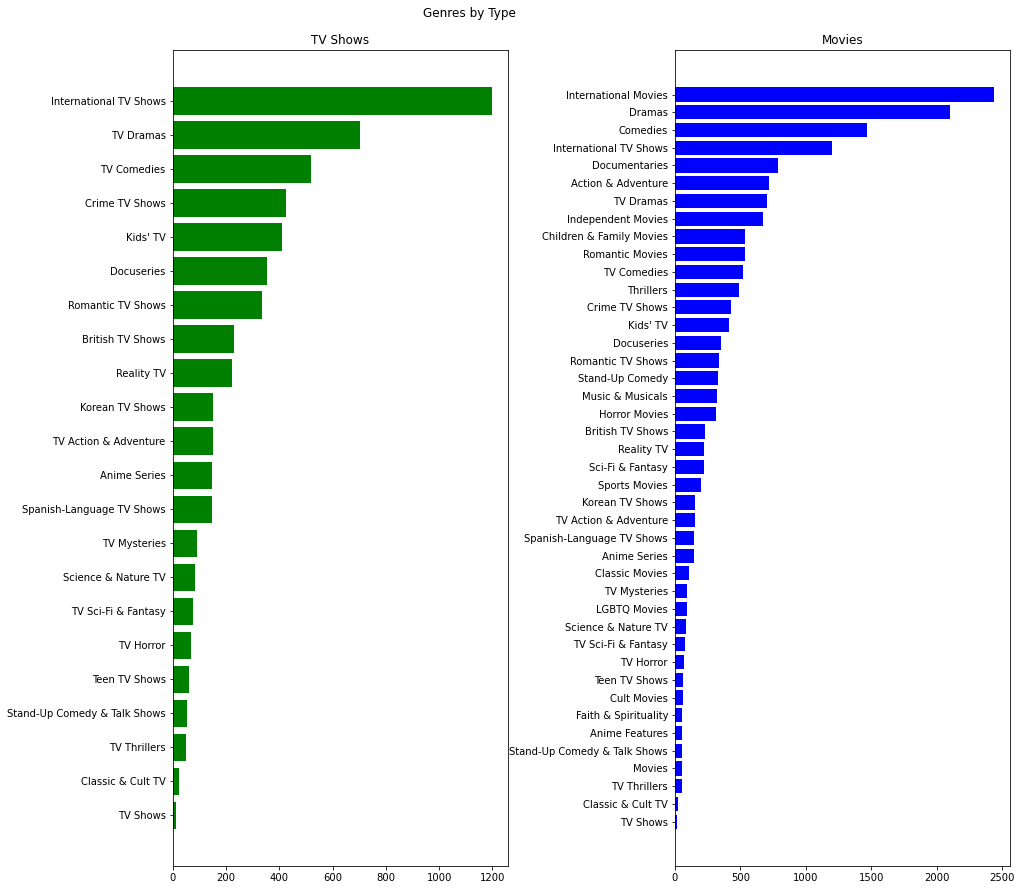

In [48]:
tvshow_genres['genre'] = tvshow_genres['listed_in'].str.split(',')
movie_genres['genre'] = movie_genres['listed_in'].str.split(',')
tvshow_genres.head()

tvgenre_counts=to_1D(tvshow_genres['genre']).value_counts().reset_index()
tvgenre_counts.columns=['Genre','Genre_counts']
tvgenre_counts

moviegenre_counts=to_1D(df['genre']).value_counts().reset_index()
moviegenre_counts.columns=['Genre','Genre_counts']
moviegenre_counts

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,15))
plt.subplots_adjust(wspace=0.5)
ax[0].barh(tvgenre_counts['Genre'],tvgenre_counts['Genre_counts'],color='green')
ax[0].set_title('TV Shows')
ax[0].invert_yaxis()
ax[1].barh(moviegenre_counts['Genre'],moviegenre_counts['Genre_counts'],color='blue')
ax[1].invert_yaxis()
ax[1].set_title('Movies')
plt.suptitle("Genres by Type",x=0.4,y=0.92);


In [92]:
tempdf = df[['listed_in','release_year','rating']]
tempdf.columns=['genre','release_year','rating']
tempdf['genre'] = tempdf['genre'].str.split(',')
tempdf=tempdf.explode('genre')
tempdf.reset_index(drop=True,inplace=True)
tempdf.groupby(by=['release_year','genre']).count()

C:\Users\u6077221\AppData\Local\Continuum\anaconda3\envs\webdev\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


rating
release_year genre                               
1925         TV Shows                           1
1942          Documentaries                     2
             Classic Movies                     2
1943          Documentaries                     1
             Classic Movies                     1
...                                           ...
2021         Kids' TV                           4
             Reality TV                         2
             Stand-Up Comedy                    1
             Stand-Up Comedy & Talk Shows       1
             TV Action & Adventure              2

[1492 rows x 1 columns]

#####  Observation on Ratings

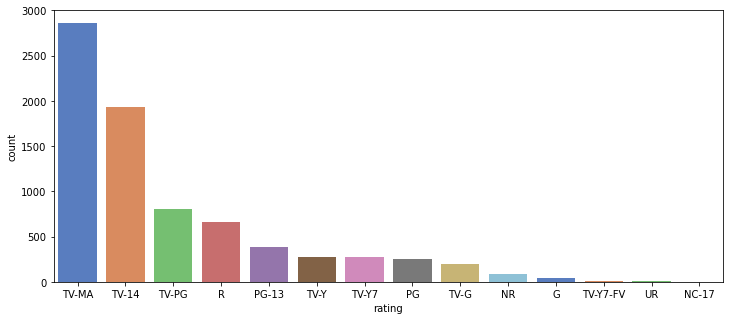

In [50]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x="rating", data=df, palette="muted", order=df['rating'].value_counts().index)

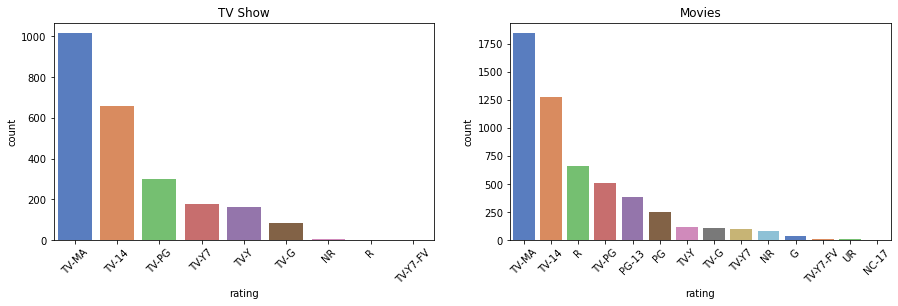

In [51]:
df1 = df[df["type"] == "TV Show"]
df2 = df[df["type"] == "Movie"]

temp_df1 = df1['rating'].value_counts().reset_index()
temp_df2 = df2['rating'].value_counts().reset_index()

fig,ax= plt.subplots(nrows=1,ncols=2,figsize=(15,4))
sns.countplot(x="rating", data=df1, palette="muted", order=df1['rating'].value_counts().index,ax=ax[0])
ax[0].set_title('TV Show')
ax[0].set_xticklabels(labels=df1['rating'].value_counts().index,rotation=45);
sns.countplot(x="rating", data=df2, palette="muted", order=df2['rating'].value_counts().index,ax=ax[1])
ax[1].set_title('Movies')
ax[1].set_xticklabels(labels=df2['rating'].value_counts().index,rotation=45);


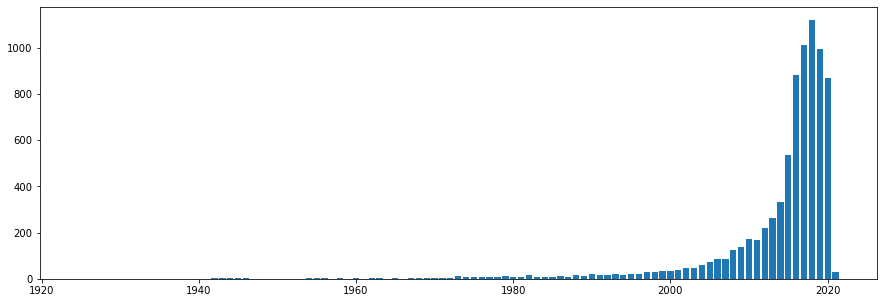

In [73]:
tempdf=df['release_year'].value_counts().reset_index().sort_values(by='index')
tempdf

plt.figure(figsize=(15,5))
plt.bar(tempdf['index'],tempdf['release_year']);

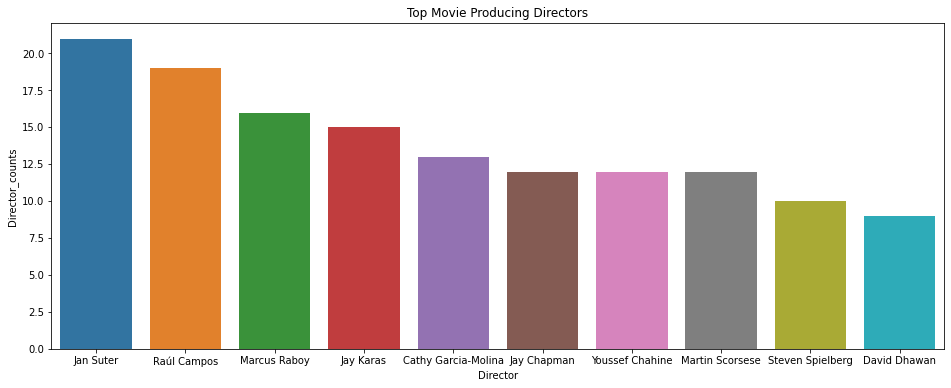

In [107]:
df['director2'] = df['director'].str.split(',')
director_counts=to_1D(df['director2']).value_counts().reset_index()
director_counts.columns=['Director','Director_counts']
director_counts=director_counts[director_counts['Director'] != 'Director NA']

top_10_directors = director_counts.head(10)

plt.figure(figsize=(16,6))
plt.title('Top Movie Producing Directors')
sns.barplot(x=top_10_directors['Director'], y=top_10_directors['Director_counts'])
plt.show()

In [108]:
top_10_directors

,Director,Director_counts
1,Jan Suter,21
2,Raúl Campos,19
3,Marcus Raboy,16
4,Jay Karas,15
5,Cathy Garcia-Molina,13
6,Jay Chapman,12
7,Youssef Chahine,12
8,Martin Scorsese,12
9,Steven Spielberg,10
10,David Dhawan,9


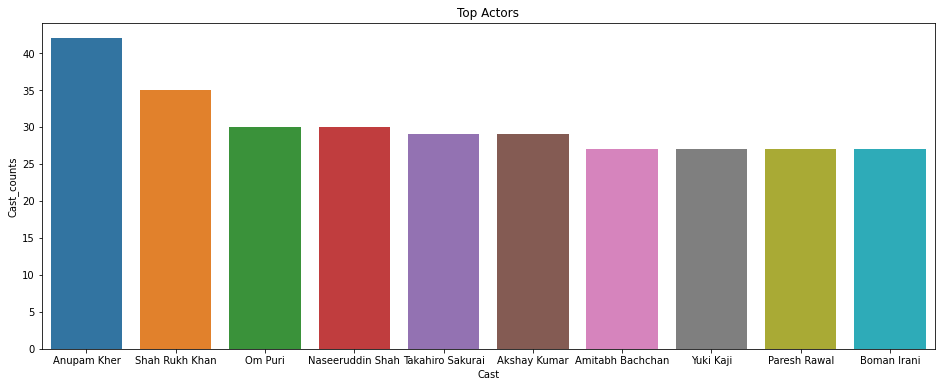

In [115]:
df['cast2'] = df['cast'].str.split(',')
cast_counts=to_1D(df['cast2']).value_counts().reset_index()
cast_counts.columns=['Cast','Cast_counts']
cast_counts=cast_counts[cast_counts['Cast'] != 'Cast NA']
cast_counts
top_10_cast = cast_counts.head(10)

plt.figure(figsize=(16,6))
plt.title('Top Actors')
sns.barplot(x=top_10_cast['Cast'], y=top_10_cast['Cast_counts'])
plt.show()

In [116]:
top_10_cast

,Cast,Cast_counts
1,Anupam Kher,42
2,Shah Rukh Khan,35
3,Om Puri,30
4,Naseeruddin Shah,30
5,Takahiro Sakurai,29
6,Akshay Kumar,29
7,Amitabh Bachchan,27
8,Yuki Kaji,27
9,Paresh Rawal,27
10,Boman Irani,27
